# ANALYZING BAY WHEELS BIKE SHARING (2018 QUARTER IV)
## by Ayoade Olayiwola

## Preliminary Wrangling

> This project explores the 2018 4th Quarter dataset of ford gobike trips - a dataset of about 446,956 rows and 16 columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

%matplotlib inline
#importing required libraries

In [2]:
folder_name = 'Data2018Q4'
frames = [pd.read_csv(f) for f in glob.glob(os.path.join(folder_name, '*.csv'))]
result = pd.concat(frames, ignore_index=True)
print(result.shape)
result.sample(5)
#Fetching and merging all monthly trip data together

(466956, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
198253,2841,2018-10-01 11:49:28.0110,2018-10-01 12:36:49.0580,323.0,Broadway at Kearny,37.798014,-122.405950,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3981,Subscriber,1994.0,Male,Yes
208121,852,2018-11-29 18:26:42.9690,2018-11-29 18:40:55.7890,22.0,Howard St at Beale St,37.789756,-122.394643,64.0,5th St at Brannan St,37.776754,-122.399018,4391,Subscriber,1982.0,Male,No
68776,155,2018-10-21 09:02:23.2610,2018-10-21 09:04:58.7720,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,239,Subscriber,1968.0,Female,Yes
153066,134,2018-10-08 11:04:07.5750,2018-10-08 11:06:22.5010,243.0,Bancroft Way at College Ave,37.869360,-122.254337,253.0,Haste St at College Ave,37.866418,-122.253799,2607,Subscriber,1961.0,Male,No
179068,422,2018-10-03 23:21:53.6660,2018-10-03 23:28:56.3080,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,3128,Subscriber,1994.0,Male,No


In [3]:
result.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No
1,56428,2018-10-31 20:18:02.8810,2018-11-01 11:58:31.1460,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,1798,Customer,NaN,NaN,No
2,44825,2018-10-31 20:07:13.3780,2018-11-01 08:34:19.3670,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,1983.0,Female,No
3,55461,2018-10-31 17:06:37.6830,2018-11-01 08:30:59.2200,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,1992.0,Female,No
4,47724,2018-10-31 18:27:36.8230,2018-11-01 07:43:01.5610,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,2392,Customer,NaN,NaN,No


In [4]:
result.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
466951,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
466952,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
466953,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
466954,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No
466955,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [5]:
result.to_csv('fgb2018q4.csv', index=False)
# saving the appended result to a .csv for further usage

In [6]:
df = pd.read_csv('fgb2018q4.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No
1,56428,2018-10-31 20:18:02.8810,2018-11-01 11:58:31.1460,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,1798,Customer,NaN,NaN,No
2,44825,2018-10-31 20:07:13.3780,2018-11-01 08:34:19.3670,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,1983.0,Female,No
3,55461,2018-10-31 17:06:37.6830,2018-11-01 08:30:59.2200,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,1992.0,Female,No
4,47724,2018-10-31 18:27:36.8230,2018-11-01 07:43:01.5610,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,2392,Customer,NaN,NaN,No


In [7]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
466951,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
466952,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
466953,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
466954,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No
466955,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466956 entries, 0 to 466955
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             466956 non-null  int64  
 1   start_time               466956 non-null  object 
 2   end_time                 466956 non-null  object 
 3   start_station_id         464924 non-null  float64
 4   start_station_name       464924 non-null  object 
 5   start_station_latitude   466956 non-null  float64
 6   start_station_longitude  466956 non-null  float64
 7   end_station_id           464924 non-null  float64
 8   end_station_name         464924 non-null  object 
 9   end_station_latitude     466956 non-null  float64
 10  end_station_longitude    466956 non-null  float64
 11  bike_id                  466956 non-null  int64  
 12  user_type                466956 non-null  object 
 13  member_birth_year        448193 non-null  float64
 14  memb

(466956, 16)

**data cleaning**

In [9]:
df2 = df.copy()
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

df2['start_station_id'] = df2['start_station_id'].astype('str')
df2['end_station_id'] = df2['end_station_id'].astype('str')
df2['bike_id'] = df2['bike_id'].astype('str')

df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

df2.info(null_counts=True)
#This makes a copy of the dataframe and fixes incorrect datatypes in some of the fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466956 entries, 0 to 466955
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             466956 non-null  int64         
 1   start_time               466956 non-null  datetime64[ns]
 2   end_time                 466956 non-null  datetime64[ns]
 3   start_station_id         466956 non-null  object        
 4   start_station_name       464924 non-null  object        
 5   start_station_latitude   466956 non-null  float64       
 6   start_station_longitude  466956 non-null  float64       
 7   end_station_id           466956 non-null  object        
 8   end_station_name         464924 non-null  object        
 9   end_station_latitude     466956 non-null  float64       
 10  end_station_longitude    466956 non-null  float64       
 11  bike_id                  466956 non-null  object        
 12  user_type       

In [10]:
df2.duplicated().sum()

0

In [11]:
df2.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name          2032
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name            2032
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          18763
member_gender              18749
bike_share_for_all_trip        0
dtype: int64

In [12]:
df2['start_date'] = df2.start_time.dt.strftime('%Y-%m-%d')
df2['start_hourofday'] = df2.start_time.dt.strftime('%H')
df2['start_dayofweek'] = df2.start_time.dt.strftime('%A')
df2['start_month'] = df2.start_time.dt.strftime('%B')

df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_dayofweek,start_month
0,80066,2018-10-31 20:49:03.140,2018-11-01 19:03:30.055,138.0,Jersey St at Church St,37.750900,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No,2018-10-31,20,Wednesday,October
1,56428,2018-10-31 20:18:02.881,2018-11-01 11:58:31.146,75.0,Market St at Franklin St,37.773793,-122.421239,86.0,Market St at Dolores St,37.769305,-122.426826,1798,Customer,NaN,NaN,No,2018-10-31,20,Wednesday,October
2,44825,2018-10-31 20:07:13.378,2018-11-01 08:34:19.367,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,122.0,19th St at Mission St,37.760299,-122.418892,1575,Customer,1983.0,Female,No,2018-10-31,20,Wednesday,October
3,55461,2018-10-31 17:06:37.683,2018-11-01 08:30:59.220,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,16.0,Steuart St at Market St,37.794130,-122.394430,2978,Subscriber,1992.0,Female,No,2018-10-31,17,Wednesday,October
4,47724,2018-10-31 18:27:36.823,2018-11-01 07:43:01.561,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,2392,Customer,NaN,NaN,No,2018-10-31,18,Wednesday,October


In [13]:
df2 = df2[df2['member_gender'].isnull() == False]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448207 entries, 0 to 466954
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             448207 non-null  int64         
 1   start_time               448207 non-null  datetime64[ns]
 2   end_time                 448207 non-null  datetime64[ns]
 3   start_station_id         448207 non-null  object        
 4   start_station_name       446225 non-null  object        
 5   start_station_latitude   448207 non-null  float64       
 6   start_station_longitude  448207 non-null  float64       
 7   end_station_id           448207 non-null  object        
 8   end_station_name         446225 non-null  object        
 9   end_station_latitude     448207 non-null  float64       
 10  end_station_longitude    448207 non-null  float64       
 11  bike_id                  448207 non-null  object        
 12  user_type       

In [14]:
df2['member_age'] = 2020 - df2['member_birth_year']
df2.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,448207.000000,448207.000000,448207.000000,448207.000000,448207.000000,448193.000000,448193.000000
mean,739.580326,37.765537,-122.348075,37.765644,-122.347508,1983.874324,36.125676
std,1620.573961,0.108221,0.125664,0.108068,0.125013,10.320603,10.320603
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1888.000000,20.000000
25%,341.000000,37.770407,-122.411726,37.771058,-122.409449,1979.000000,29.000000
50%,539.000000,37.780955,-122.397380,37.781010,-122.397086,1986.000000,34.000000
75%,829.000000,37.795393,-122.286533,37.795393,-122.289415,1991.000000,41.000000
max,86205.000000,37.880222,-121.874119,37.880222,-121.874119,2000.000000,132.000000


The table above gives the descriptive statistics of the variables, specifically the count; mean; standard deviation; first, second and third quartile as well as the maximum value

In [15]:
df2.to_csv('clean_dataset.csv', index=False)
#Saves the clean dataset

### What is the structure of your dataset?

> *The dataset contains 466,956 rows and 16 columns, each row representing an individual's trip records on 16 variables*

> *The dataset contains trip duration in seconds (duration_sec), start time of trip duration  (start_time), end time of trip duration (end_time). In addition to these start_date, start_hourofday, start_dayofweek, start_month were derived to aid exploration and analysis*

> *The data also contains information about the station. These are start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude*

> *Also included in the dataset are information about members. These are bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip. In addition to these member_age was derived to aid exploration and analysis*


### What is/are the main feature(s) of interest in your dataset?

> *Of main importance to me is the characteristics of riders as it relates to trips taking and their use of the bike sharing service. I'll examine when and under what conditions most trips are taken*

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> *The given and derived information about the member (age, gender, type) as well as information on the trips will help in my investigation and in answering the questions posed*

## 1}. Univariate Exploration

**a}.Histogram of Duration_sec**

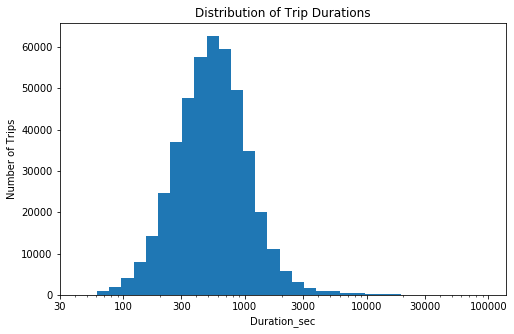

In [16]:
bin_edges = 10 ** np.arange(1.785330, 4.936358 + 0.1, 0.1)
ticks = [30,100,300,1000,3000,10000,30000,100000]
labls = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8, 5])
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.hist(data = df2, x ='duration_sec', bins = bin_edges);
plt.xscale("log");
plt.xticks(ticks,labls);

Here, I examined the duration of bike trips (duration_sec) observation in the period defined. I observed that most time spent cycling is between 300 and 1000 seconds. Next, I'll examine the distribution on member-age

In [17]:
np.log10(df2['duration_sec'].describe())

count    5.651479
mean     2.868985
std      3.209669
min      1.785330
25%      2.532754
50%      2.731589
75%      2.918555
max      4.935532
Name: duration_sec, dtype: float64

**b}. Distribution of Members Age**

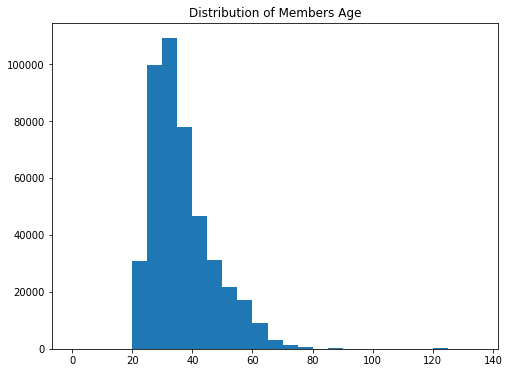

In [18]:
plt.figure(figsize=[8, 6])
plt.title('Distribution of Members Age')
bins = np.arange(0, df2['member_age'].max()+5, 5)
plt.hist(df2['member_age'].dropna(), bins=bins);

For age, it can be observed that the distribution is more concentrated between 25 to 40 years old. The presence of outliers was also observed here. This was removed below and the plot represented

**c}. Distribution of Members Age II - Outliers Removed**

In [19]:
df2 = df2.query('member_age <= 70')
df2['member_birth_year'] = df2['member_birth_year'].astype('int')
df2['member_age'] = df2['member_age'].astype('int')
df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446309 entries, 0 to 466954
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             446309 non-null  int64         
 1   start_time               446309 non-null  datetime64[ns]
 2   end_time                 446309 non-null  datetime64[ns]
 3   start_station_id         446309 non-null  object        
 4   start_station_name       444329 non-null  object        
 5   start_station_latitude   446309 non-null  float64       
 6   start_station_longitude  446309 non-null  float64       
 7   end_station_id           446309 non-null  object        
 8   end_station_name         444329 non-null  object        
 9   end_station_latitude     446309 non-null  float64       
 10  end_station_longitude    446309 non-null  float64       
 11  bike_id                  446309 non-null  object        
 12  user_type       

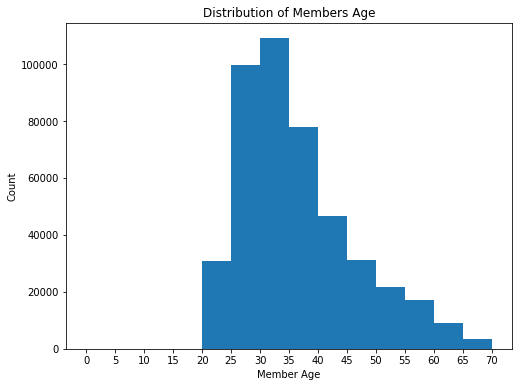

In [20]:
bins = np.arange(0, df2['member_age'].max()+5, 5)
plt.figure(figsize=[8, 6])
plt.title('Distribution of Members Age')
plt.hist(data=df2, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.xlabel('Member Age');
plt.ylabel('Count');

The distribution of age is confirmed here again. 25-35 years appears as a better approximation of the concentration now; We also have the outliers removed now. It appears that usage of the bike sharing service reduces as people age.
Next I examined the distribution of biketrips according to the day of the week

In [21]:
df2['start_dayofweek'] = df2['start_dayofweek'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446309 entries, 0 to 466954
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             446309 non-null  int64         
 1   start_time               446309 non-null  datetime64[ns]
 2   end_time                 446309 non-null  datetime64[ns]
 3   start_station_id         446309 non-null  object        
 4   start_station_name       444329 non-null  object        
 5   start_station_latitude   446309 non-null  float64       
 6   start_station_longitude  446309 non-null  float64       
 7   end_station_id           446309 non-null  object        
 8   end_station_name         444329 non-null  object        
 9   end_station_latitude     446309 non-null  float64       
 10  end_station_longitude    446309 non-null  float64       
 11  bike_id                  446309 non-null  object        
 12  user_type       

**d}. Distribution of Bike Trips according to the Day of the Week**

In [22]:
df2['start_dayofweek'].value_counts()

Monday       77906
Tuesday      77430
Wednesday    77086
Thursday     74622
Friday       67189
Saturday     38858
Sunday       33218
Name: start_dayofweek, dtype: int64

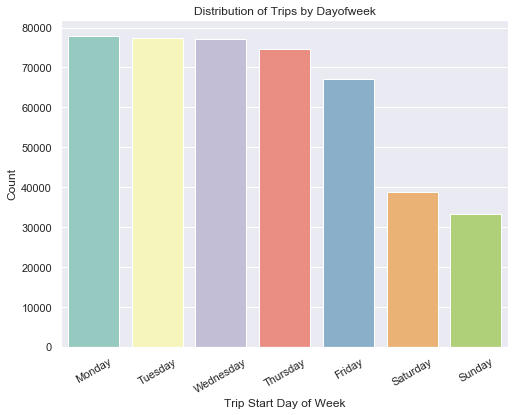

In [23]:
dayofwk = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofwkcat = pd.api.types.CategoricalDtype(ordered=True, categories=dayofwk)
df2['start_dayofweek'] = df2['start_dayofweek'].astype(dayofwkcat)

plt.figure(figsize=[8, 6])
sns.set(style="darkgrid")
sns.countplot(x ='start_dayofweek',data=df2, palette = "Set3");
plt.title('Distribution of Trips by Dayofweek')
plt.xticks(rotation=30);
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

In looking at the distribution of trips according to the day of the week, It is interesting to me that we only have marginal differences on weekdays. Though Monday is the highest and the lowest distributions are on weekends, the difference in the distributions of trips from Monday to Friday is not much. We can say that the bulk of the demand for the service is on weekdays.
Next, I examined the distribution/count of trips according to hours of the day

**e}. Hourly Distribution of Trips**

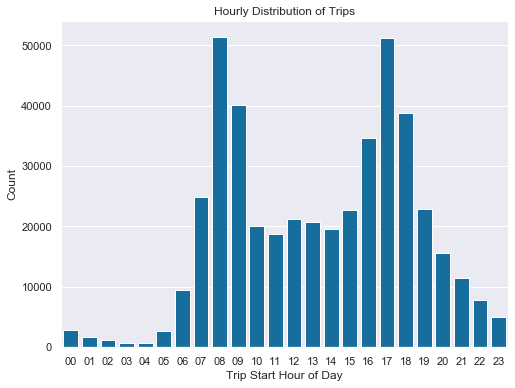

In [24]:
plt.rcParams['figure.figsize'] = 8, 6
base_color = sns.color_palette('colorblind')[0]
sns.set_style('darkgrid')

sns.countplot(data=df2, x='start_hourofday', color=base_color);
plt.title('Hourly Distribution of Trips')
plt.xlabel('Trip Start Hour of Day');
plt.ylabel('Count');

This analysis reveals that trips peak at 7am-9am and 4pm to 6pm
Next, I examined the distribution/count of trips according to each month of the last quarter of 2018

**f}. Distribution/Count of Trips in each month of the quarter**

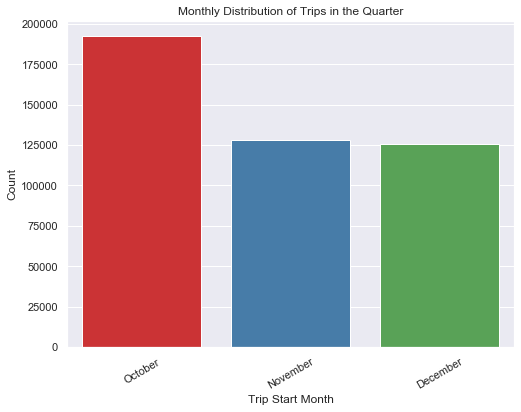

In [25]:
month = ['October', 'November', 'December']
monthcat = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df2['start_month'] = df2['start_month'].astype(monthcat)

sns.countplot(data=df2, x='start_month',palette="Set1");
plt.title('Monthly Distribution of Trips in the Quarter')
plt.xticks(rotation=30);
plt.xlabel('Trip Start Month');
plt.ylabel('Count');

Here, October has the highest figure while December is only slighly lower than November in the distribution of trips
Next I examined the member-gender variable in the dataset

**g}. Exploring member_gender**

In [26]:
df2['member_gender'].value_counts()

Male      331453
Female    107916
Other       6940
Name: member_gender, dtype: int64

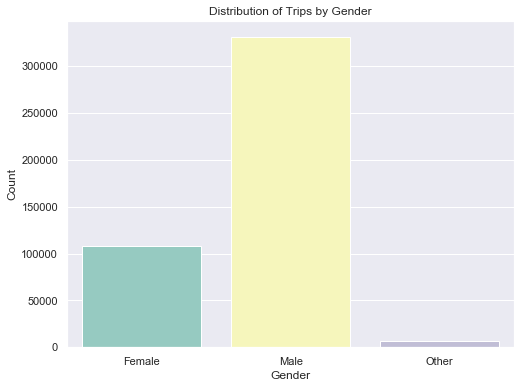

In [27]:
sns.countplot(data=df2, x='member_gender', palette="Set3");
plt.title('Distribution of Trips by Gender')
plt.xlabel('Gender');
plt.ylabel('Count');

The predominant user of the bike sharing servive are males; like 300% of the female users

**h}. Exploring user_type**

In [28]:
df2['user_type'].value_counts()

Subscriber    399784
Customer       46525
Name: user_type, dtype: int64

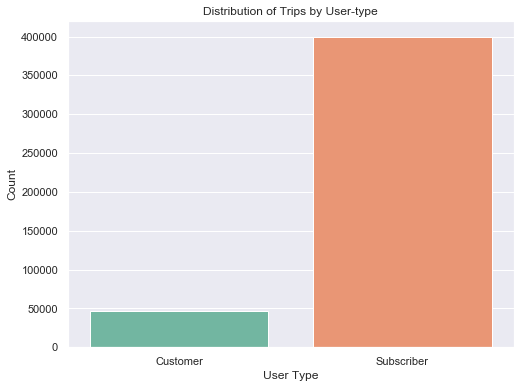

In [29]:
sns.countplot(data=df2, x='user_type', palette="Set2");
plt.title('Distribution of Trips by User-type')
plt.xlabel('User Type');
plt.ylabel('Count');

This shows that most of the members were subscribers; a small proportion are customers or casual riders.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The trip distribution over day shows that the majority of rides happened on work days (Monday to Friday) and the hourly distribution peaks at 7am-9am and 4pm to 6pm. This implies that the primary usage is probably for commuting and during the busy or rush hours of the day. 

> In the 4th quarter of 2018 examined, October had the most ride trips compared to the others. The reason for this may be beyond the scope of this dataset.

> Most riders were male subscribers; most members were around 25 to 40 years old (the age group in population known to be active and very mobile). This corresponds to the trip distribution plots that most trips were on Monday to Friday and the peak hours earlier stated. We can say that bike usage dropped significantly as people get older.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I would say there were no unusual distributions. I changed the datatypes for some of the variable and for member_age, I had to remove outliers with .query() to make for smoother exploration and analysis

## 2}. Bivariate Exploration

**a}. Exploring count of trips by start_hourofday and start_dayofweek**

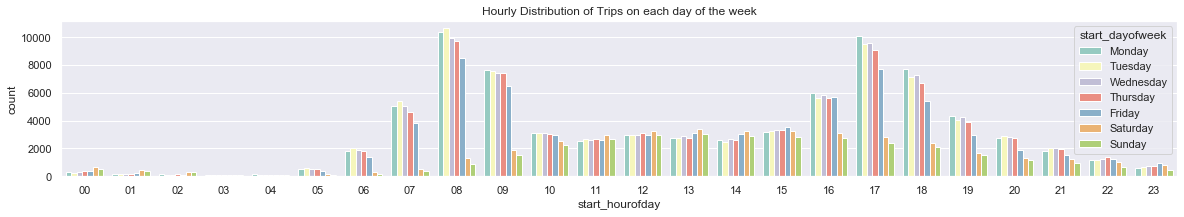

In [30]:
plt.figure(figsize = [20, 20]);

plt.subplot(6, 1, 1);
plt.title('Hourly Distribution of Trips on each day of the week')
sns.countplot(data = df2, x = 'start_hourofday', hue = 'start_dayofweek', palette = 'Set3');

No interesting insight here besides what has been earlier explained under univariate exploration on the peak hours and the concentration of trips on weekdays

**b}. Exploring usage or count of trips by start_hourofday and member_gender**

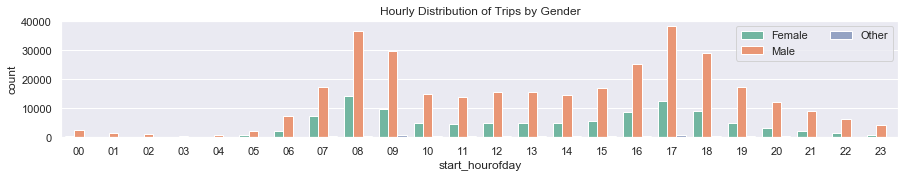

In [31]:
plt.figure(figsize = [15, 15]);

ax = plt.subplot(6, 1, 2);
plt.title('Hourly Distribution of Trips by Gender')
sns.countplot(data = df2, x = 'start_hourofday', hue = 'member_gender', palette = 'Set2');
ax.legend(ncol = 2); 

This strengthens the earlier observation that the predominant users are males

**c}. Exploring usage or count of trips by start_hourofday and user_type (customers and subscribers)**

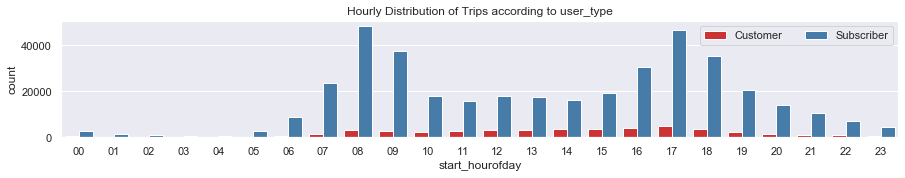

In [32]:
plt.figure(figsize = [15, 15]);

ax = plt.subplot(6, 1, 3);
plt.title('Hourly Distribution of Trips according to user_type')
sns.countplot(data = df2, x = 'start_hourofday', hue = 'user_type', palette = 'Set1');
ax.legend(loc = 1, ncol = 2); 

This further validates the earlier observation that the predominant members are subscribers. In the hourly count of trips, we have the majority as being subscribers. The (near) absence of customer is noticed in the very early and late hours of the day. It appears that the major use by customers is during the day (late morning to afternoon)


**d}. Exploring usage or count of trips by start_dayofweek and member_gender**

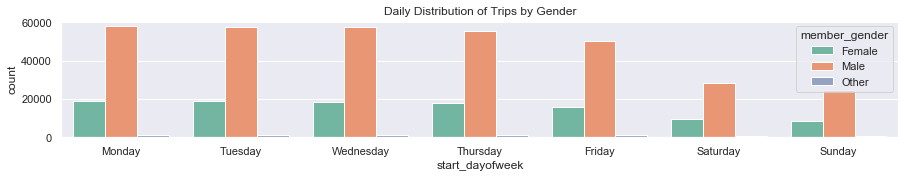

In [33]:
plt.figure(figsize = [15, 15]);

ax = plt.subplot(6, 1, 4);
plt.title('Daily Distribution of Trips by Gender')
sns.countplot(data = df2, x = 'start_dayofweek', hue = 'member_gender', palette = 'Set2');

This strengthens the earlier observation that the predominant users are males. So on each day of the week the proportion of users are more of males than females

**e}. Comparing usage on days of the week by user_type (customers and subscribers)**

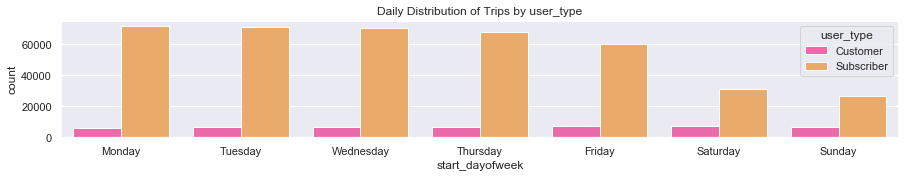

In [34]:
plt.figure(figsize = [15, 15]);

ax = plt.subplot(6, 1, 5);
plt.title('Daily Distribution of Trips by user_type')
sns.countplot(data = df2, x = 'start_dayofweek', hue = 'user_type', palette = 'spring');

We see again that on each day of the week the majority of the users are subscribers. The earlier pattern of a concentration on weekdays is also borne out here I observed a slight increase of use for customers on weekends probably because their usage is more for leisure or other non-work purposes.

**f}. Exploring gender composition of user_type (customers and subscribers)**

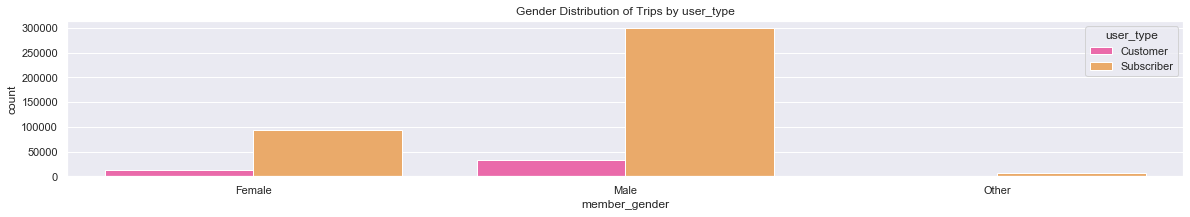

In [35]:
plt.figure(figsize = [20, 20]);

ax = plt.subplot(6, 1, 6);
plt.title('Gender Distribution of Trips by user_type')
sns.countplot(data = df2, x = 'member_gender', hue = 'user_type', palette = 'spring');

We have more males than females who are customer and we have more males than females who are subscribers. This confirms the earlier observation that there are generally more males than female users of the bike sharing service.

**g}. Exploring monthly usage between customers and subscribers**

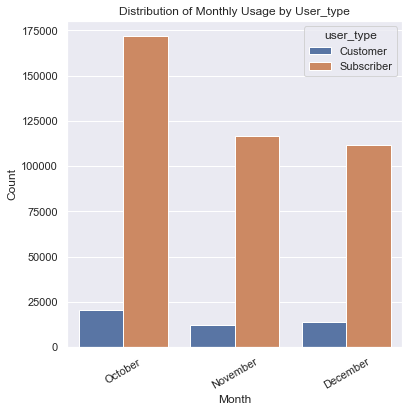

In [36]:
plt.figure(figsize = [6, 6]);

plt.title('Distribution of Monthly Usage by User_type')
sns.countplot(data=df2, x='start_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Count');

We have more subscribers than customers in each month in the data. This also confirms the earlier observation that there are generally more subscribers than customers. In no month do we have an exception. An interesting here however is that while usage fell for subscribers over the period, usage by customers rose slighly between November and December

**h}. Exploring member_age between customers and subscribers**

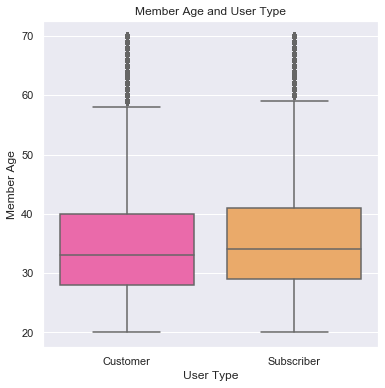

In [37]:
plt.figure(figsize = [6, 6]);

sns.boxplot(data=df2, x='user_type', y='member_age', palette = 'spring');
plt.title('Member Age and User Type')
plt.xlabel('User Type');
plt.ylabel('Member Age');

Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group.
This box plot shows that subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well.

**i}. Exploring usage member_age by day of the week**

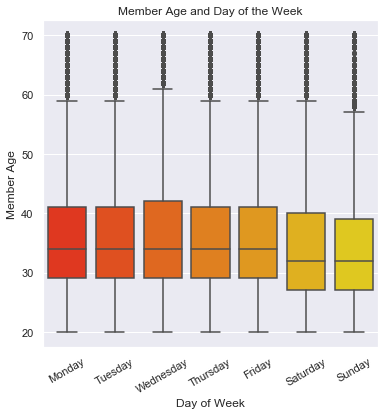

In [38]:
plt.figure(figsize = [6, 6]);

sns.boxplot(data=df2, x='start_dayofweek', y='member_age', palette = 'autumn');
plt.xticks(rotation=30);
plt.title('Member Age and Day of the Week')
plt.xlabel('Day of Week');
plt.ylabel('Member Age');

This box plots reveals that users of the service on Monday through to Friday are slightly older than those who ride on weekends. This corresponds to the commute to work usage that was observed from the above univariate exploration plots.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Here, the earlier submissions that we have most of the users being males, most being subscribers, also about the peak hours of the day and the peak days of the week are all upheld and further confirmed

> In the hourly count of trips, we have the majority as being subscribers. The (near) absence of customer is noticed in the very early and late hours of the day. It appears that the major use by customers is during the day (late morning to afternoon). A slight increase of use for customers on weekends is also observed, probably because their usage is more for 
leisure or other non-work purposes.

> It was also observed that subscribers who ride most often Monday through Friday are slightly older than customers, with a wider range of ages as well. This corresponds to the commute to work usage that was observed from the above univariate exploration plots.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to me that while usage fell for subscribers over the period (October to December 2018), usage by customers rose slightly between November and December of the year.

## 3}. Multivariate Exploration

**a}. Exploring relationship/interaction between user_type, member_gender and average duration of trips**

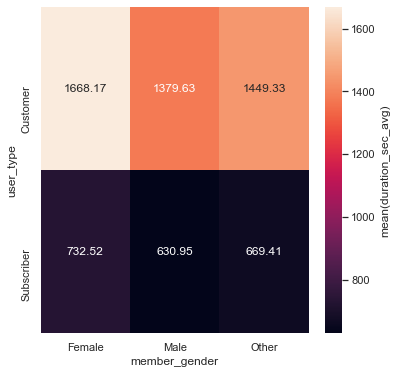

In [39]:
plt.figure(figsize = [6, 6]);

cat_means = df2.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec_avg')
sns.heatmap(cat_means, annot = True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(duration_sec_avg)'});

A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.
This visualization shows that females travel longer durations than males. This applies to both user-types. So while we have more male users, we have females using the service for longer durations than males

**b}.Exploring how average trip duration vary in weekdays between customers and subscribers?**

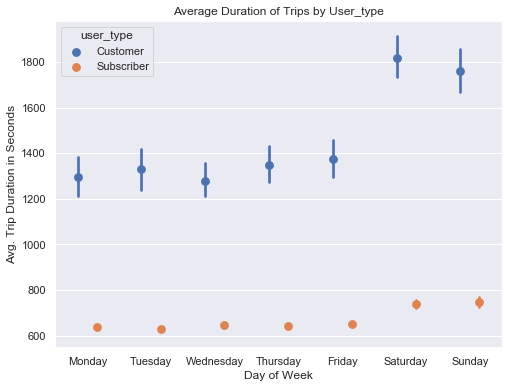

In [40]:
sns.pointplot(data=df2, x='start_dayofweek', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.title('Average Duration of Trips by User_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Seconds');

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter. It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types maintain a fairly consistent average duration Monday through Friday.

**c}. Exploring relationship/interaction between user_type, member_gender and member_age**

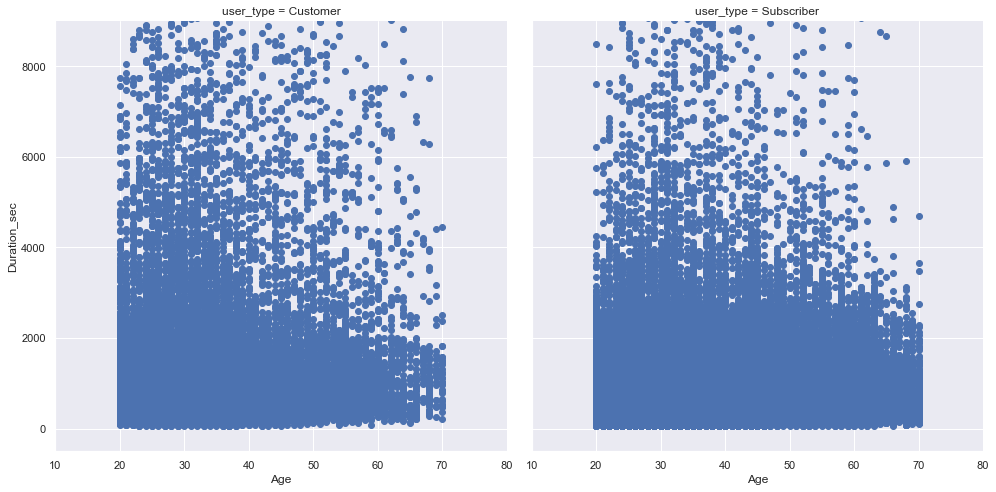

In [41]:
user_type = sns.FacetGrid(data = df2, col = 'user_type', col_wrap = 2, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')

plt.show()

A facetgrid class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset.
This visualization shows a similar trends for both customers and subscribers in terms of age and trip duration. Trip duration however to be higher at old age for subscribers.

**d}. Exploring relationship/interaction between member_gender, member_age and average duration of trips**

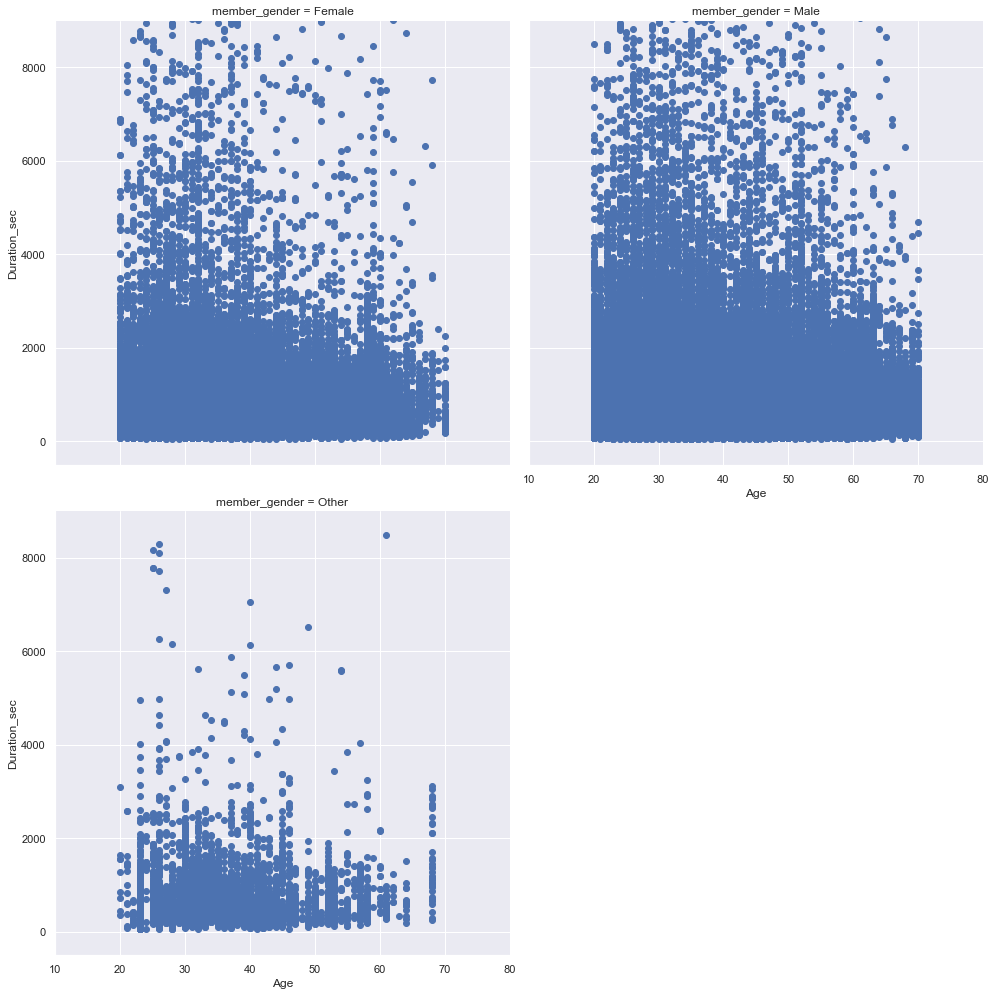

In [42]:
gender = sns.FacetGrid(data = df2, col = 'member_gender', col_wrap = 2, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'member_age', 'duration_sec', alpha= 1)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')

plt.show()

This visualization shows that the trend is almost the same for males and females in trip duration For the age and trip duration. The trip duration is concentrated at 4,000 seconds and below. The "others" is a bit more scattered.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> While we have more male users, we have females using the service for longer durations than males

> It was also observed that though we less customers than subscribers, subscribers ride much shorter/quicker trips compared to customers on each day of the week. Both user types maintain a fairly consistent average duration Monday through Friday.

### Were there any interesting or surprising interactions between features?

> It was interesting to me that we have more females using the service for longer durations than males!